#   Online Ice



In [350]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [ ]:

df_games=pd.df = pd.read_csv('games.csv')

##  Descripción de los datos

In [353]:
#verificamos informacion del dataset
df_games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [354]:
#verificamos valores duplicados
df_games.duplicated().sum()

np.int64(0)

In [355]:
#verificamos valores ausentes
df_games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Observaciones:

Los datos ausentes pueden deberse a que, para juegos antiguos, la información puede no haberse registrado originalmente o haberse perdido con el tiempo.
En cuanto a las puntuaciones de usuarios o críticos, los juegos más antiguos pueden no haber sido evaluados formalmente o no haber recibido suficientes reseñas, o incluso si el dataset fue consolidado de múltiples fuentes, podrían haberse omitido campos durante la integración.

In [356]:
#verificamos la proporcion de valores ausentes 
df_games.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Observaciones:

Como la proporcion de valores ausentes en las columnas `name`, `genre`y `year of release` es muy pequeña (menor al 1%) vamos a eliminar esos datos ausentes. 

En el caso de la columna `critic_score` sustituiremos los datos faltantes por el valor 999 (este valor lo excluiremos despues en nuestro analisis).

La columna `year_of_release`la convertiremos a tipo entero, ya que estamos representando años. 

La columna `user_score` la convertiremos a tipo float, para poder realizar métricas, pero primero remplazaremos los valores 'tbd' por NaN (Not a Number), para poder hacer la conversión. Sustituiremos los datos faltantes por 999 (asi como en critic_score este valor lo excluiremos despues en nuestro analisis).

Por último en la columna `rating` sustituiremos los datos faltantes por el valor 'RP' (Rating Pending)

## Preprocesamiento de los datos

In [357]:
#remplazamos los nombres de las columnas en minusculas 
df_games.columns=df_games.columns.str.lower()

In [358]:
#Eliminamos los datos ausentes en las columnas name, genre y year of release
df_games.dropna(subset=['name', 'genre','year_of_release'],inplace=True)
df_games['year_of_release']=df_games['year_of_release'].astype(int) #cambiamos a tipo de dato entero

#rellenamos los valores ausentes de la columna critic_score por la media de los valores no ausentes y cambiamos a tipo float
df_games['critic_score'] = df_games['critic_score'].fillna(999)
df_games['user_score'] = df_games['user_score'].replace('tbd', np.nan).astype(float)

#rellenamos los valores ausentes de la columna user_score por RP (Rating Pending)
df_games['user_score'] = df_games['user_score'].fillna(999)
df_games['rating'] = df_games['rating'].fillna('RP')
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
13694,Gravity Falls: Legend of the Gnome Gemulets,3DS,2015,Action,0.03,0.00,0.00,0.00,46.0,5.8,E
14848,Clannad,X360,2008,Adventure,0.00,0.00,0.03,0.00,999.0,999.0,RP
12575,Doraemon: Nobita no Uchuu Eiyuuki,3DS,2015,Action,0.00,0.00,0.06,0.00,999.0,999.0,RP
16140,Dead Rising,XOne,2016,Action,0.01,0.00,0.00,0.00,999.0,8.8,M
209,Link's Crossbow Training,Wii,2007,Shooter,3.05,1.17,0.29,0.46,68.0,7.1,T


In [359]:
#Agregaremos otra columna con las ventas totales (la suma de las ventas en todas las regiones) para cada juego
df_games['total_sales']=df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales']
df_games.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14302,Casino Chaos With Las Vegas Players Collection,PC,2011,Misc,0.03,0.00,0.00,0.00,999.0,999.0,T,0.03
3626,Daytona USA,SAT,1994,Racing,0.00,0.00,0.55,0.00,999.0,999.0,RP,0.55
7062,WWE All Stars,3DS,2011,Fighting,0.15,0.06,0.00,0.02,71.0,7.4,T,0.23
7399,WCW Nitro,N64,1998,Fighting,0.17,0.04,0.00,0.00,999.0,999.0,RP,0.21
6650,Final Fantasy II,WS,2001,Role-Playing,0.00,0.00,0.25,0.00,999.0,999.0,RP,0.25


## Análisis de los datos

### Juegos lanzados por año. 

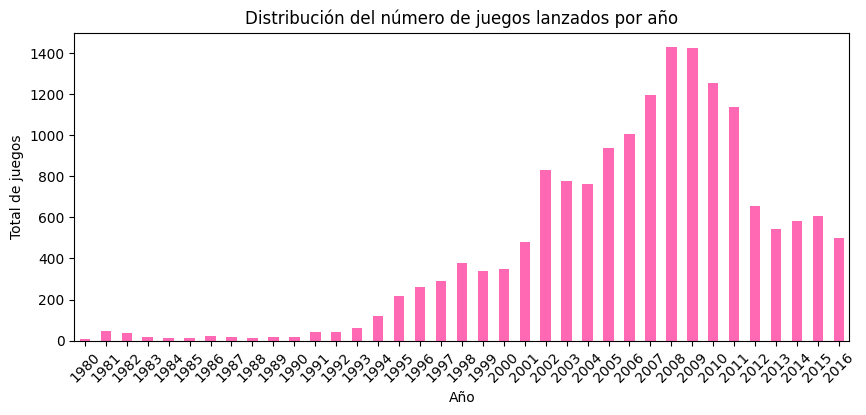

In [360]:
total_games=df_games.groupby('year_of_release')['name'].count().sort_index()
total_games.plot(kind='bar',figsize=(10,4), color='hotpink', rot=45)
plt.title('Distribución del número de juegos lanzados por año')
plt.xlabel('Año')
plt.ylabel('Total de juegos')
plt.show()


Observaciones:

El gráfico muestra la cantidad de juegos lanzados por año desde 1980 hasta 2016. A partir de él podemos notar:

Crecimiento inicial lento, esto se debe a que los lanzamientos de juegos eran muy limitados antes de la década de 1990.

Hubo un gran crecimiento en los lanzamientos de juegos entre 2000 y 2008, alcanzando el pico en 2008 con más de 1,400 juegos.
Esto coincide con la popularidad de consolas.

A partir de 2009, se observa una disminución gradual en el número de lanzamientos anuales.
Esto podría deberse a una saturación del mercado,  cambios en las plataformas o un enfoque en juegos de mayor calidad y presupuesto.

Aunque hay una disminución en los lanzamientos, en un período reciente (2014-2016), los números aún son significativos, con más de 400 juegos por año.

### Ventas por plataforma (TOP 10)

In [361]:
# Agrupamos las ventas totales por plataforma
sales_by_platform=df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

#Seleccionaremos las 10 plataformas con mayores ventas totales
top_platforms=sales_by_platform.head(10)

top_platforms


platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: total_sales, dtype: float64

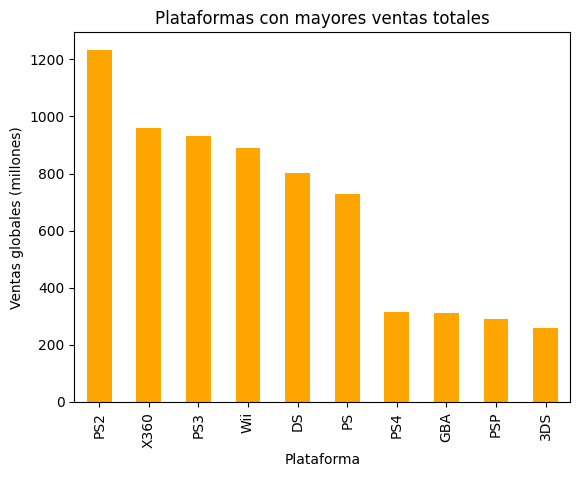

In [362]:
# Visualizar ventas por plataforma
top_platforms.plot(kind='bar', color='orange')
plt.title('Plataformas con mayores ventas totales')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.show()

Observaciones:

Entre las plataformas líderes PS2 es la plataforma con mayores ventas totales globales (1234 millones), seguida por Xbox 360, y PS3.
La plataforma con menos ventas totales es 3DS (257 millones)



### Distribución de ventas de las plataformas principales por año.

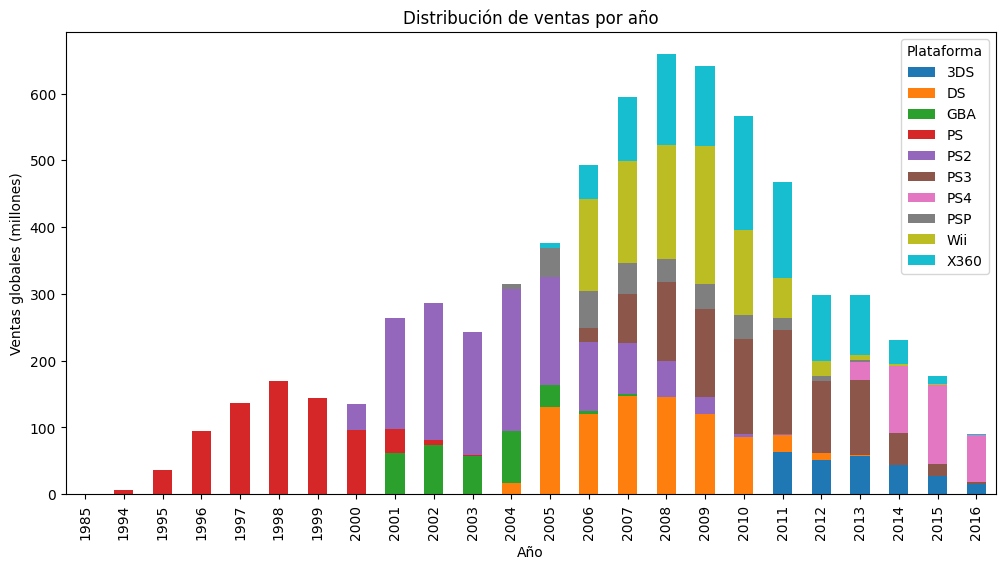

In [363]:
# Filtramos datos para plataformas principales
filtered_data = df_games[df_games['platform'].isin(top_platforms.index)]

# Ventas por año para plataformas principales
sales_by_year = filtered_data.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

# Graficamos para visualizar los datos
sales_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Distribución de ventas por año')
plt.xlabel('Año')
plt.ylabel('Ventas globales (millones)')
plt.legend(title='Plataforma')
plt.show()

Observaciones: 

Plataformas con mayores ventas totales:

Wii, DS, y X360 parecen liderar en ventas durante su período de mayor popularidad, especialmente entre 2005 y 2010.
PS2 tuvo un fuerte inicio desde el 2000 y mantuvo relevancia durante casi toda la década.

Distribución de ventas por año:

Las ventas globales alcanzaron su punto máximo en torno a 2008-2009, con múltiples plataformas como Wii, DS, y X360 contribuyendo significativamente.

Años recientes (2014-2016):

Las plataformas más recientes, como PS4 y 3DS, comienzan a reemplazar a las antiguas como PS3 y X360.



### Plataformas que solían ser populares pero ya no tienen ventas recientes.

In [364]:
# Identificar plataformas activas en los últimos años (2014-2016)
recent_years = df_games[df_games['year_of_release'] >= 2014]
active_platforms = recent_years['platform'].unique()
active_platforms=pd.Series(active_platforms)
print("Plataformas populares activas (2014-2016):\n", active_platforms)

# Listamos plataformas que no tienen ventas recientes
inactive_platforms = []
for p in df_games['platform'].unique():
    if p not in active_platforms:
        inactive_platforms.append(p)
inactive_platforms=pd.Series(inactive_platforms)
print("Plataformas populares sin ventas recientes:\n", inactive_platforms)

Plataformas populares activas (2014-2016):
 0     PS4
1     3DS
2    XOne
3    WiiU
4     PS3
5    X360
6      PC
7     Wii
8     PSV
9     PSP
dtype: object
Plataformas populares sin ventas recientes:
 0      Wii
1      NES
2       GB
3       DS
4     X360
5      PS3
6      PS2
7     SNES
8      GBA
9      PS4
10     3DS
11     N64
12      PS
13      XB
14      PC
15    2600
16     PSP
17    XOne
18    WiiU
19      GC
20     GEN
21      DC
22     PSV
23     SAT
24     SCD
25      WS
26      NG
27    TG16
28     3DO
29      GG
30    PCFX
dtype: object


In [365]:
# Calcular el rango de años para cada plataforma
platform_years = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])


# Calcular la duración (años de actividad)
platform_years['duration'] = platform_years['max'] - platform_years['min']
platform_years = platform_years.sort_values(by='duration', ascending=False)
print(platform_years)

# Promedio de duración de plataformas
mean_duration = platform_years['duration'].describe()
print("Duración promedio de las plataformas:\n", mean_duration)



           min   max  duration
platform                      
PC        1985  2016        31
DS        1985  2013        28
GB        1988  2001        13
NES       1983  1994        11
X360      2005  2016        11
PSP       2004  2015        11
PS2       2000  2011        11
PS3       2006  2016        10
DC        1998  2008        10
Wii       2006  2016        10
SNES      1990  1999         9
2600      1980  1989         9
PS        1994  2003         9
XB        2000  2008         8
GBA       2000  2007         7
N64       1996  2002         6
GC        2001  2007         6
PSV       2011  2016         5
SAT       1994  1999         5
3DS       2011  2016         5
GEN       1990  1994         4
WiiU      2012  2016         4
NG        1993  1996         3
XOne      2013  2016         3
PS4       2013  2016         3
WS        1999  2001         2
3DO       1994  1995         1
SCD       1993  1994         1
GG        1992  1992         0
PCFX      1996  1996         0
TG16    

In [366]:
# Analizar plataformas recientes
recent_platforms = platform_years[platform_years['max'] >= 2014].sort_values(by='min')
print("\nPlataformas recientes:\n", recent_platforms)


Plataformas recientes:
            min   max  duration
platform                      
PC        1985  2016        31
PSP       2004  2015        11
X360      2005  2016        11
PS3       2006  2016        10
Wii       2006  2016        10
PSV       2011  2016         5
3DS       2011  2016         5
WiiU      2012  2016         4
XOne      2013  2016         3
PS4       2013  2016         3


Observaciones: 

PS2, PSP, GBA, y DS solían ser muy populares, pero han desaparecido en años recientes (después de 2013).

Plataformas antiguas (PS2, Wii,DC) tuvieron un ciclo de vida de alrededor de 10 años.

Las nuevas plataformas, como PS4 y 3DS, aparecen entre 2012 y 2014, mostrando una transición gradual.

Las plataformas tienen un ciclo de vida promedio de 8 a 10 años, donde alcanzan su punto máximo de ventas en los primeros 5 años después de su lanzamiento.

El período reciente (2014-2016) está dominado por plataformas modernas como PS4 y 3DS, mientras que plataformas clásicas como PS2 y Wii ya no generan ventas.

### Seleccionamos sólo los juegos lanzados entre 2013 y 2016 para nuestro análisis. 

Las plataformas antiguas ya no son relevantes para el mercado de 2017.
Los cambios en el mercado (nuevas plataformas y géneros) hacen que los datos históricos pierdan valor.

Los datos más cercanos a 2017 son más útiles, ya que reflejan las tendencias actuales y recientes. Podemos seleccionar un período basado en el análisis de ventas y actividad de plataformas. 



In [367]:
# Filtrar datos para años recientes (2013-2016)
relevant_data = df_games[(df_games['year_of_release'] >= 2013) & (df_games['year_of_release'] <= 2016)]

relevant_data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6172,Payday 2,PS4,2015,Shooter,0.10,0.14,0.00,0.05,999.0,999.0,RP,0.29
15690,Starry ? Sky: After Summer,PSP,2013,Misc,0.00,0.00,0.02,0.00,999.0,999.0,RP,0.02
10591,Scribblenauts Unmasked: A DC Comics Adventure,3DS,2013,Puzzle,0.09,0.00,0.00,0.01,68.0,6.2,E10+,0.10
2138,Dead Space 3,PS3,2013,Action,0.44,0.36,0.00,0.16,76.0,6.4,M,0.96
8820,3rd Super Robot Wars Z: Tengoku-Hen,PS3,2015,Action,0.00,0.00,0.15,0.00,999.0,999.0,RP,0.15


### Ventas totales por plataforma

In [368]:
# Agrupamos ventas totales por plataforma (2013-2016)
recent_platform_sales = relevant_data.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

print('Plataformas líderes en ventas (2013-2016):')
print(recent_platform_sales)



Plataformas líderes en ventas (2013-2016):
   platform  total_sales
4       PS4       314.14
3       PS3       181.43
10     XOne       159.32
0       3DS       143.25
9      X360       136.80
8      WiiU        64.63
2        PC        39.43
6       PSV        32.99
7       Wii        13.66
5       PSP         3.50
1        DS         1.54


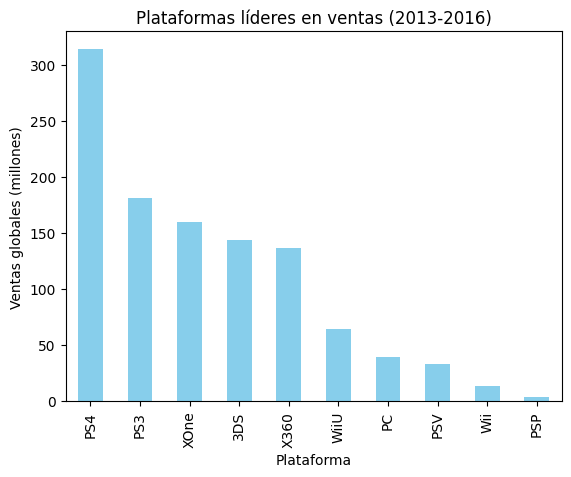

In [369]:
# Visualizar las 10 plataformas líderes durante el periodo 2013-2016
recent_platform_sales.head(10).plot(kind='bar',x='platform', color='skyblue', legend=False)
plt.title('Plataformas líderes en ventas (2013-2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (millones)')
plt.show()

### Crecimiento/declive de plataformas

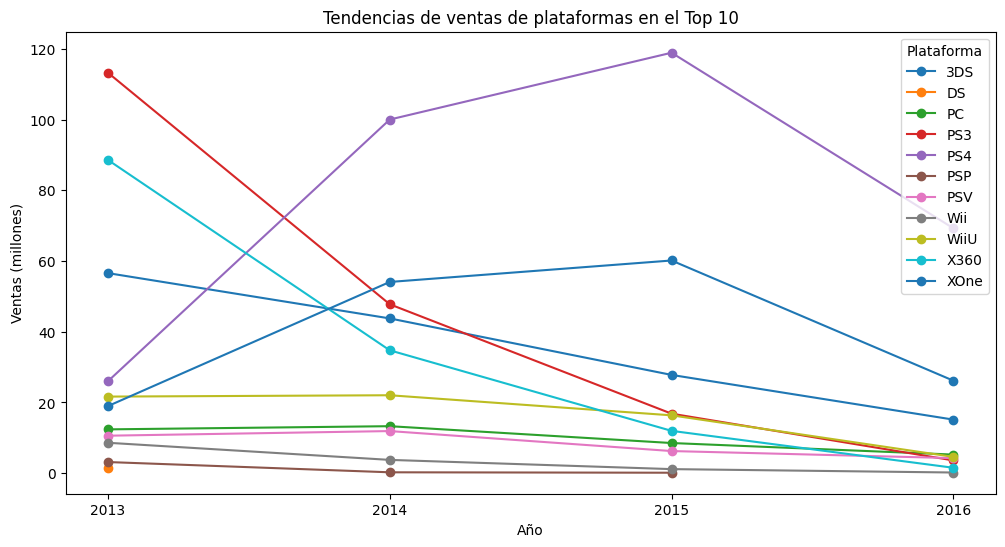

In [370]:
# agrupar las ventas de las  plataformas líderes durante el periodo 2013-2016
sales_trends = pd.pivot_table(relevant_data, values='total_sales',columns='platform',index='year_of_release',aggfunc='sum')

#graficamos para visualizar los datos
sales_trends.plot(kind='line',figsize=(12, 6),marker='o')
plt.title('Tendencias de ventas de plataformas en el Top 10')
plt.xlabel('Año')
plt.ylabel('Ventas (millones)')
plt.xticks (ticks=range(2013, 2017))
plt.legend(title='Plataforma', loc='upper right')
plt.show()

Observaciones: 

PS3 y X360: Estas plataformas muestran una clara tendencia a la baja durante estos años, probablemente debido al final de su ciclo de vida útil y la llegada de nuevas generaciones de consolas.

PS4 y XOne: Estas plataformas emergen como las nuevas líderes, con un aumento inicial en ventas.

DS, PSP y Wii: Presentan un declive continuo, alineándose con su reemplazo por dispositivos más modernos como el 3DS y la Wii U.

PC: Parece mantener ventas estables, sin un crecimiento o declive significativo.

Wii U: Aunque intenta ganar terreno, parece no alcanzar el éxito de la Wii.

### Distribución de las ventas promedio por plataforma

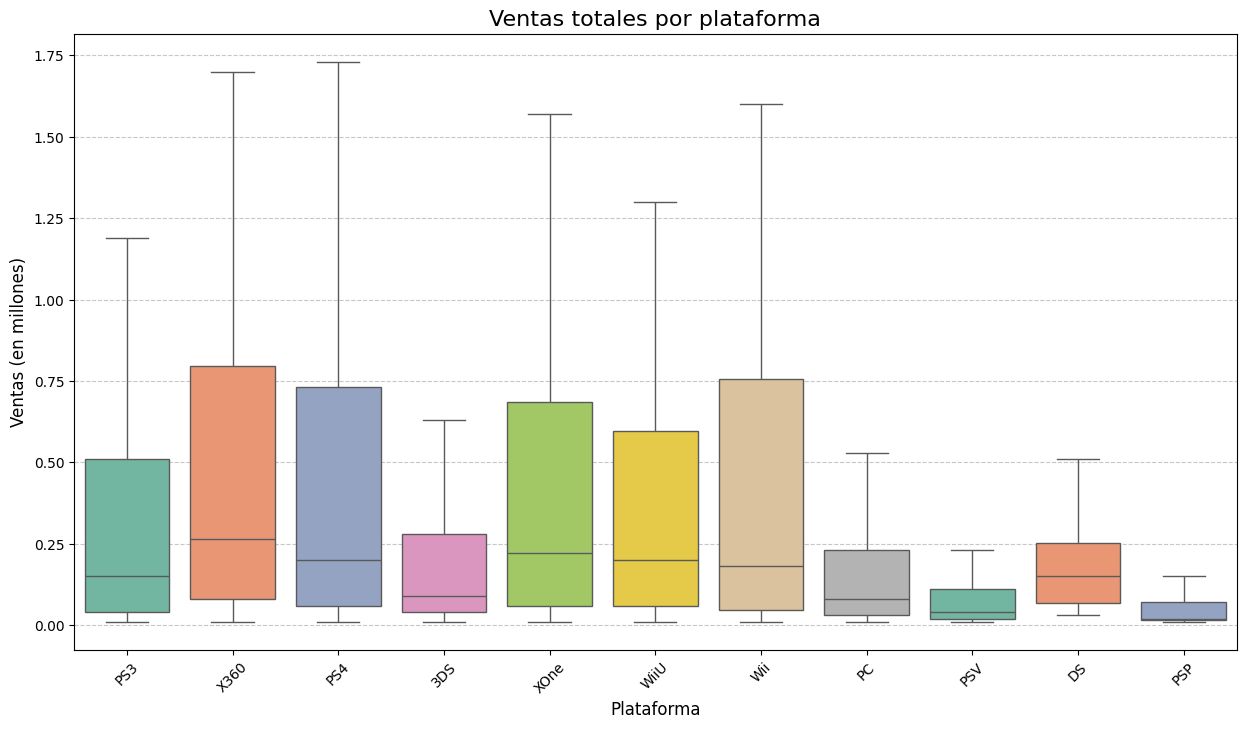

Ventas promedio por plataforma:
 platform
PS4     0.801378
X360    0.735484
XOne    0.645020
Wii     0.593913
WiiU    0.562000
PS3     0.525884
3DS     0.472772
PC      0.208624
DS      0.192500
PSV     0.092151
PSP     0.052239
Name: total_sales, dtype: float64


In [371]:
#Diagrama de caja para las ventas globales de todos los juegos. 
plt.figure(figsize=(15, 8))
sns.boxplot(data=relevant_data, x='platform', y='total_sales', showfliers=False, palette ='Set2', hue='platform')
plt.title('Ventas totales por plataforma', fontsize=16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas (en millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calcular las ventas promedio por plataforma
average_sales = relevant_data.groupby('platform')['total_sales'].mean().sort_values(ascending=False)
print("Ventas promedio por plataforma:\n", average_sales)

Observaciones: 

Las plataformas como Wii, PS4 y X360 muestran medianas más altas, lo que indica que sus juegos, en promedio, tienen mayores ventas globales.
Otras plataformas como PCV y PSP tienen medianas más bajas, lo que refleja ventas menores en comparación.

Si observamos los límites en los bigotes, las plataformas como Wii y X360 tienen juegos que lograron ventas globales significativamente altas y las plataformas como PCV y PSP tienen límites superiores más bajos, lo que sugiere que incluso sus títulos más vendidos no alcanzan las cifras de las plataformas líderes


### Relación entre las reseñas y las ventas globales para PS4



In [372]:
#Filtramos los datos para la plataforma PS4 y excluiremos los datos no rankeados (con 999)
data_ps4=relevant_data.query('platform=="PS4" and critic_score != 999 and user_score != 999')
data_ps4.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


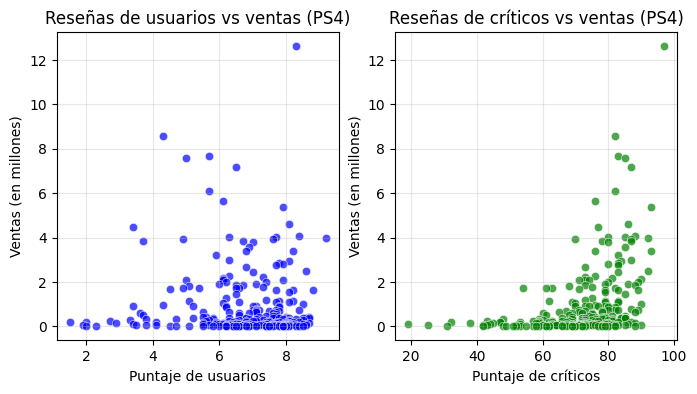

In [373]:
# Crearemos gráficos de dispersión para visualizar la correlacion de las ventas con las calificaciones de críticos y usuarios
plt.figure(figsize=(8, 4))

# Reseñas de usuarios vs ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_ps4, x='user_score', y='total_sales', color='blue', alpha=0.7)
plt.title('Reseñas de usuarios vs ventas (PS4)')
plt.xlabel('Puntaje de usuarios')
plt.ylabel('Ventas (en millones)')
plt.grid(alpha=0.3)

# Reseñas de críticos vs ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_ps4, x='critic_score', y='total_sales', color='green', alpha=0.7)
plt.title('Reseñas de críticos vs ventas (PS4)')
plt.xlabel('Puntaje de críticos')
plt.ylabel('Ventas (en millones)')
plt.grid(alpha=0.3)

plt.show()

In [374]:
# Calcularmos correlaciones entre puntaje de críticos y usuarios
correlation_user = data_ps4['user_score'].corr(data_ps4['total_sales'])
correlation_critic = data_ps4['critic_score'].corr(data_ps4['total_sales'])

print(f"Correlación entre puntaje de usuarios y ventas: {correlation_user:.2f}")
print(f"Correlación entre puntaje de críticos y ventas: {correlation_critic:.2f}")

Correlación entre puntaje de usuarios y ventas: -0.03
Correlación entre puntaje de críticos y ventas: 0.41


Observaciones: 

El valor -0.03 entre puntaje de usuarios y ventas indica una correlación débil negativa, prácticamente inexistente.
Esto quiere decir que las reseñas de los usuarios no parecen tener un impacto significativo en las ventas de los juegos para PS4. 

El valor 0.41 entre puntaje de críticos y ventas representa una correlación positiva moderada.
Sugiere que las reseñas de los críticos tienen un impacto más notable en las ventas globales, aunque no es extremadamente fuerte. Esto tiene sentido, ya que las críticas profesionales suelen influir en la percepción inicial del público y pueden impulsar las ventas. 

### Comparación de juegos en diferentes plataformas. 


De los juegos con mayores ventas seleccionamos los siguientes:
*   **Grand Theft Auto V** 
*   **Call of Duty: Black Ops 3** 
*   **Call of Duty: Ghosts**


In [375]:
sales_by_game = relevant_data.groupby(['name', 'platform'])['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
sales_by_game.head(10)

,name,platform,total_sales
748,Grand Theft Auto V,PS3,21.05
750,Grand Theft Auto V,X360,16.27
254,Call of Duty: Black Ops 3,PS4,14.63
1402,Pokemon X/Pokemon Y,3DS,14.60
749,Grand Theft Auto V,PS4,12.62
1398,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,11.68
261,Call of Duty: Ghosts,X360,10.24
258,Call of Duty: Ghosts,PS3,9.36
1167,Minecraft,X360,9.18
606,FIFA 16,PS4,8.58


In [376]:
#Filtramos los juegos de estudio
game1 = sales_by_game[sales_by_game['name'] == 'Grand Theft Auto V']
game2=sales_by_game[sales_by_game['name'] == 'Call of Duty: Ghosts']
game3=sales_by_game[sales_by_game['name'] == 'Call of Duty: Black Ops 3']


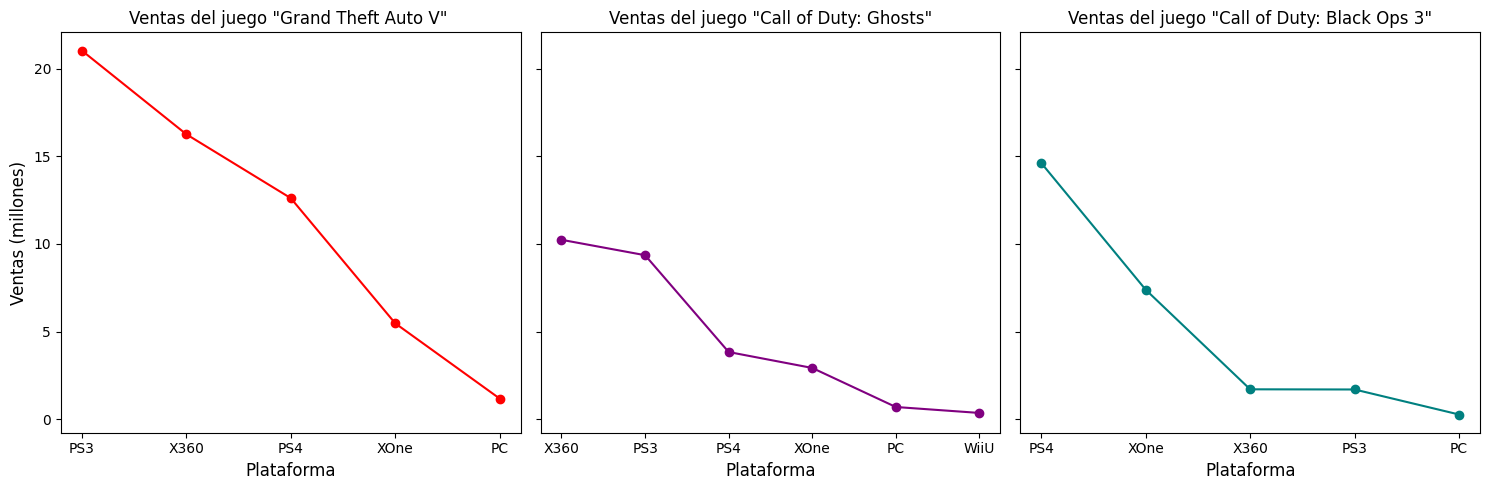

In [377]:
#Graficamos para visualizar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].plot(game1['platform'],game1['total_sales'],color='red',marker='o')
axs[0].set_title('Ventas del juego "Grand Theft Auto V" ')
axs[0].set_ylabel('Ventas (millones)', fontsize=12)
axs[0].set_xlabel('Plataforma', fontsize= 12)


axs[1].plot(game2['platform'],game2['total_sales'], color='purple',marker='o')
axs[1].set_title('Ventas del juego "Call of Duty: Ghosts"')
axs[1].set_xlabel('Plataforma', fontsize= 12)

axs[2].plot(game3['platform'],game3['total_sales'], color ='teal',marker='o')
axs[2].set_title('Ventas del juego "Call of Duty: Black Ops 3"')
axs[2].set_xlabel('Plataforma',fontsize= 12)


plt.tight_layout()
plt.show()

Observaciones:

*  Grand Theft Auto V: Las mayores ventas se observan en PS3 y X360, seguidas por PS4 y XOne.
Las ventas en PC son las más bajas para este juego.

*  Call of Duty: Ghosts: Presenta una distribución similar en ventas entre las plataformas principales, pero incluye la Wii U, que tiene las menores ventas.
Las mayores ventas ocurren en X360 y PS3, mientras que las de PC y Wii U son mucho menores.

*  Call of Duty: Black Ops 3: Tiene mayores ventas en PS4 y XOne, con un descenso progresivo en X360, PS3 y PC.

### Distribución de juegos por género

In [378]:
games_by_genre= relevant_data.pivot_table( values='name', index='genre', aggfunc='count' )


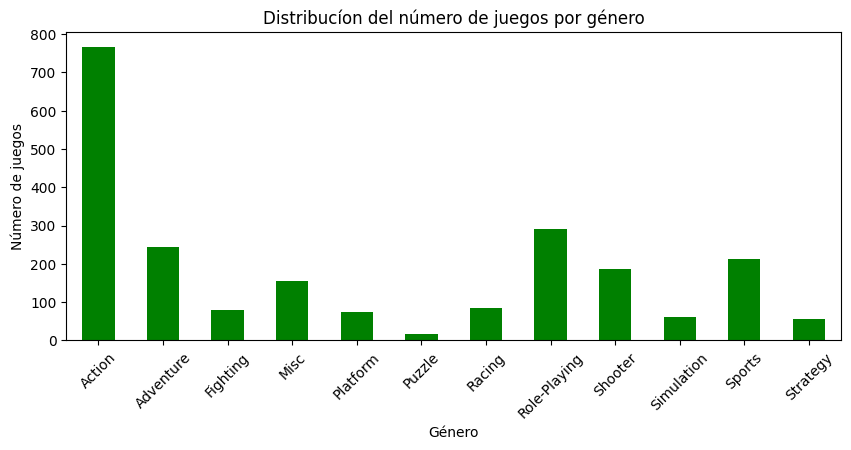

In [379]:
games_by_genre.plot(kind='bar', figsize=(10, 4), color='green',legend=False, rot=45)
plt.title('Distribucíon del número de juegos por género')
plt.xlabel('Género')
plt.ylabel('Número de juegos')
plt.show()

Observaciones:

El género con mayor cantidad de juegos es claramente Acción, seguido de Role_Playing.
Los géneros con menor cantidad de juegos son Puzzle y Strategy.
Existe una distribución bastante desigual entre los diferentes géneros. Algunos géneros tienen una representación mucho mayor que otros.

### Distribución de ventas por plataforma para cada región

In [380]:
#Agrupamos las ventas por plataforma para las regiones de Norteamérica, Europa y Japón. 
na_platform=relevant_data.groupby('platform').agg({'na_sales':'sum'}).sort_values(by='na_sales',ascending=False).head(5)
eu_platform=relevant_data.groupby('platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',ascending=False).head(5)
jp_platform=relevant_data.groupby('platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',ascending=False).head(5)


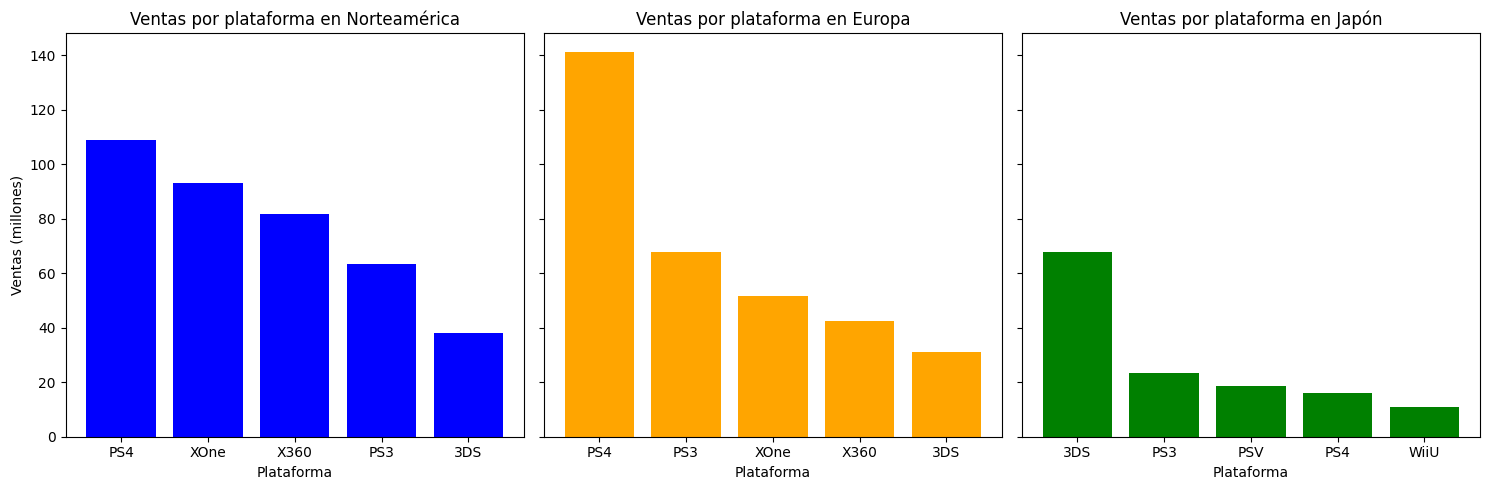

In [381]:
#Graficamos para visualizar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].bar(na_platform.index, na_platform['na_sales'],color='blue')
axs[0].set_title('Ventas por plataforma en Norteamérica')
axs[0].set_ylabel('Ventas (millones)')
axs[0].set_xlabel('Plataforma')

axs[1].bar(eu_platform.index, eu_platform['eu_sales'], color='orange')
axs[1].set_title('Ventas por plataforma en Europa')
axs[1].set_xlabel('Plataforma')

axs[2].bar(jp_platform.index, jp_platform['jp_sales'], color ='green')
axs[2].set_title('Ventas por plataforma en Japón')
axs[2].set_xlabel('Plataforma')

plt.tight_layout()
plt.show()

Observaciones:

La plataforma PlayStation 4 (PS4) destaca como la más vendida en Norteamérica y Europa, superando significativamente a sus competidores. Esto sugiere una amplia aceptación de la PS4 por parte de los jugadores en estos mercados.
En Japón, Nintendo 3DS se posiciona como la consola líder en ventas. Esto indica una fuerte preferencia por los juegos exclusivos de Nintendo en el mercado japonés.
Las preferencias de los jugadores varían considerablemente entre las regiones. Mientras que la PS4 domina en Norteamérica y Europa, la 3DS tiene una fuerte presencia en Japón.

### Distribución de ventas por género para cada región 

In [382]:
#Agrupamos las ventas por género para las regiones de Norteamérica, Europa y Japón. 
na_genre=relevant_data.groupby('genre').agg({'na_sales':'sum'}).sort_values(by='na_sales',ascending=False).head(5)
eu_genre=relevant_data.groupby('genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',ascending=False).head(5)
jp_genre=relevant_data.groupby('genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',ascending=False).head(5)


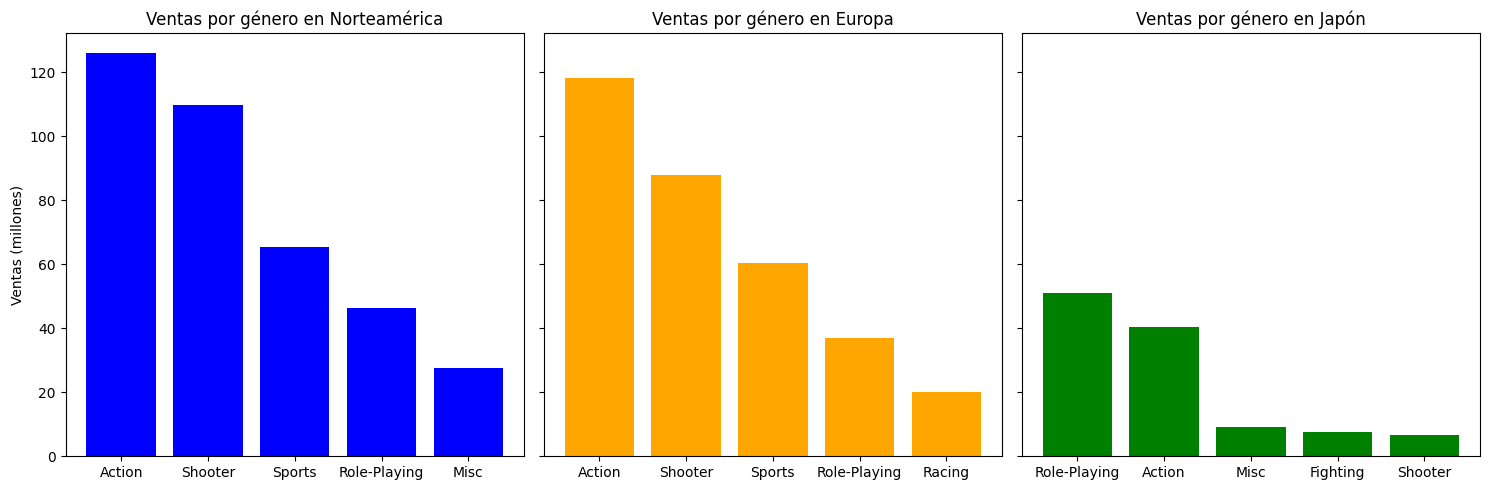

In [383]:
#Graficamos para visualizar los datos
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

axs[0].bar(na_genre.index, na_genre['na_sales'],color='blue')
axs[0].set_title('Ventas por género en Norteamérica')
axs[0].set_ylabel('Ventas (millones)')

axs[1].bar(eu_genre.index, eu_genre['eu_sales'], color='orange')
axs[1].set_title('Ventas por género en Europa')

axs[2].bar(jp_genre.index, jp_genre['jp_sales'], color ='green')
axs[2].set_title('Ventas por género en Japón')

plt.tight_layout()
plt.show()

Observaciones: 

En Norteamérica y Europa, los géneros más populares son Action y Shooter, reflejando un interés en juegos intensivos y competitivos.
En Japón, el género Rol lidera ampliamente, mostrando una preferencia por experiencias narrativas y estratégicas.



### Distribución de ventas por clasificación para cada regíon

In [384]:
#Agrupamos las clasificaciones
esrb_rating=relevant_data.groupby('rating')[['na_sales', 'eu_sales','jp_sales']].sum()
new_order = ['E','E10+','T', 'M', 'RP']
#reordenamos las clasificaciones
esrb_rating_reordered = esrb_rating.reindex(new_order)
esrb_rating_reordered


,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
T,49.79,41.95,20.59
M,165.21,145.32,14.11
RP,89.42,78.91,85.05


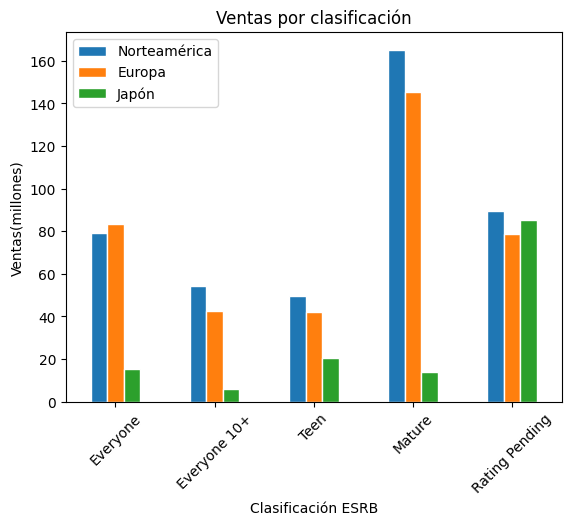

In [385]:
#Graficamos para visualizar los datos.
esrb_rating_reordered.plot(kind='bar',edgecolor='white')
plt.title('Ventas por clasificación')
plt.ylabel('Ventas(millones)')
plt.xlabel('Clasificación ESRB')
plt.legend( ['Norteamérica', 'Europa', 'Japón'])
plt.xticks([0,1,2,3,4],['Everyone', 'Everyone 10+', 'Teen', 'Mature', 'Rating Pending'], rotation=45)
plt.show()

Observaciones:

Clasificación M (Mature),tiene las mayores ventas en Norteamérica (165.21 millones) y Europa (145.32 millones), pero sus ventas son mucho menores en Japón (14.11 millones).

Clasificación E (Everyone), es popular en Norteamérica (79.05 millones) y Europa (83.36 millones), mientras que su impacto es limitado en Japón (15.14 millones).

Clasificación T (Teen) en Japón tiene una cuota relativamente alta (20.59 millones) en comparación con Norteamérica y Europa.

Clasificación E10+ tiene menor impacto en todas las regiones, siendo más popular en Norteamérica.

Las clasificaciones ESRB afectan significativamente las ventas dependiendo de la región. Los juegos para adultos (M) son más populares en Norteamérica  y Europa, mientras que en Japón  las clasificaciones amplias como E y T tienen mayor representación.

Mas de la mitad de los juegos no están calificados. 

### Pruebas de hipótesis

Utilizaremos la prueba t-Student, una prueba estadística que se utiliza para comparar medias y determinar si existen diferencias significativas entre las muestras. 

**Para comparar la calificación promedio entre plataformas:**

Hipótesis nula: la calificación promedio de los usuarios para la plataforma XOne es igual a la de los usuarios de la plataforma PC.

Hipótesis alternativa: la calificación promedio de los usuarios para la plataforma XOne es diferente a la de los usuarios de la plataforma PC.

In [386]:
from scipy.stats import levene
#separamos los grupos de estudio 
xbox_one_scores = relevant_data[relevant_data['platform'] == 'XOne']['user_score']
pc_scores = relevant_data[relevant_data['platform'] == 'PC']['user_score']


In [387]:
#Realizamos la prueba de levene para saber si la varianza de los grupos es igual
stat, p_value = levene(xbox_one_scores, pc_scores)

# Mostrar los resultados
print(f"Estadístico de Levene: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación del resultado
if p_value < 0.05:
    print("Las varianzas son significativamente diferentes (se rechaza la hipótesis nula).")
else:
    print("No hay evidencia suficiente para afirmar que las varianzas son diferentes (no se rechaza la hipótesis nula).")

Estadístico de Levene: 4.2259
Valor p: 0.0404
Las varianzas son significativamente diferentes (se rechaza la hipótesis nula).


In [388]:
#Pueba T-student
t_stat, p_value = stats.ttest_ind(xbox_one_scores,pc_scores,equal_var=False)

print(f'Estadístico t: {t_stat}')
print(f"Valor p: {p_value}")
#establecemos el valor alpha
alpha = 0.05  
if p_value < alpha:
   print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Estadístico t: 2.1043604195405634
Valor p: 0.03593172585615066
Rechazamos la hipótesis nula


Observaciones:

Dado que el valor p es 0.035, que es menor que el umbral de 0.05, podemos rechazar la hipótesis nula. Esto significa que  hay suficiente evidencia estadística para concluir que existe una diferencia significativa entre las calificaciones promedio de las plataformas XOne y PC.

**Para comparar la calificación promedio entre géneros:**

Hipótesis nula: la calificación promedio de los usuarios para el género Action es igual a la del género Sports.

Hipótesis alternativa: la calificación promedio de los usuarios para el género Action es diferente a la del género Sports.

In [389]:
#separamos los grupos de estudio 
action_genre = relevant_data[relevant_data['genre'] == 'Action']['user_score']
sports_genre = relevant_data[relevant_data['genre'] == 'Sports']['user_score']

In [390]:
#Realizamos la prueba de levene para saber si la varianza de los grupos es igual
stat, p_value = levene(action_genre, sports_genre)

# Mostrar los resultados
print(f"Estadístico de Levene: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación del resultado
if p_value < 0.05:
    print("Las varianzas son significativamente diferentes (se rechaza la hipótesis nula).")
else:
    print("No hay evidencia suficiente para afirmar que las varianzas son diferentes (no se rechaza la hipótesis nula).")

Estadístico de Levene: 40.4155
Valor p: 0.0000
Las varianzas son significativamente diferentes (se rechaza la hipótesis nula).


In [391]:
# Prueba T-student 
t_stat, p_value = stats.ttest_ind(action_genre,sports_genre,equal_var=False)

print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')
#establecemos el valor alpha
alpha = 0.05  
if p_value < alpha:
   print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")
 
    

Estadístico t: 6.914088797472979
Valor p: 1.9736407502487385e-11
Rechazamos la hipótesis nula



Observaciones: 

Dado que el valor p es extremadamente pequeño, mucho menor que el umbral de 0.05, podemos rechazar la hipótesis nula. Esto sugiere que hay una diferencia estadísticamente significativa entre las calificaciones promedio de los géneros Action y Sports.


# Conclusiones


* Hay una disminución gradual en los lanzamientos desde 2009, aunque los lanzamientos recientes (2014-2016) siguen siendo significativos (>400 juegos por año).
* En las ventas totales por plataforma PS2 lidera con 1,234 millones, seguida de Xbox 360 y PS3.
3DS tiene las menores ventas totales (257 millones).

* Las plataformas tienen un ciclo de vida promedio de 8-10 años, alcanzando su máximo en los primeros 5 años.

* Plataformas clásicas como PS2 y Wii ya no generan ventas (post-2013).
* PS4 y XOne dominan el período reciente (2014-2016) y van es ascenso, mientras que PS3 y X360 declinan.

* DS, PSP y Wii muestran declive por reemplazo de nuevas plataformas mientras PC mantiene ventas estables.

* Wii y X360 tienen juegos con ventas globales significativamente altas. PC y PSP tienen menores ventas promedio.

* Las reseñas de los usuarios no parecen tener un impacto significativo en las ventas de los juegos para PS4, mientras que las reseñas de los críticos si tienen un impacto más notable en las ventas globales, aunque no es extremadamente fuerte. Esto tiene sentido, ya que las críticas profesionales suelen influir en la percepción inicial del público y pueden impulsar las ventas. 

* Los géneros populares varían según la región, en Norteamérica y Europa los juegos de Acción son más populares, mientras que en Japón los juegos de Rol son más populares. Los géneros menos populares son Puzzle y Strategy, 

* Entre las consolas líderes PS4 domina el mercado entre  Norteamérica y Europa mientras que Nintendo 3DS lidera en Japón.

* Clasificación ESRB y ventas:
Clasificación M(Mature) tiene mayor popularidad en Norteamerica y Europa y menor en Japón.
Clasificaciones E (Everyone) y T (Teen) son más populares en Japón.
Clasificación E10+ tiene menor impacto general, siendo más relevante en Norteamérica.